In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import ttest_ind
import seaborn as sns

In [31]:
file_path_data_dic='/content/drive/MyDrive/Colab Notebooks/MSCI 719/Datasets/Case-Data 3 Data Dictionary (CSV).csv'
data_dic=pd.read_csv(file_path_data_dic)
data_dic.iloc[:,0:3:2]


,Data Dictionary,Unnamed: 2
0,"""Switchbacks"" Tab",NaN
1,Variable,Definition
2,city_id,Location where the experiment took place. In t...
3,period_start,Start date and time for the 160-minute time pe...
4,wait_time,"This variable takes on two possible values: ""2..."
5,treat,"This variable takes on two possible values: ""T..."
6,commute,"This variable takes on two possible values: ""T..."
7,trips_pool,Total number of POOL trips completed in the cu...
8,trips_express,Total number of Express POOL trips completed i...
9,rider_cancellations,Total number of requested trips that were canc...


In [32]:
file_path='/content/drive/MyDrive/Colab Notebooks/MSCI 719/Datasets/Case-Data 3-Switch backs (CSV).csv'

In [33]:
df= pd.read_csv(file_path)
df.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,19-02-2018 07:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476
1,Boston,19-02-2018 09:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275
2,Boston,19-02-2018 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962
3,Boston,19-02-2018 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021
4,Boston,19-02-2018 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979


# 1 Commute versus non-commute hours
###1. Do the commuting hours experience a higher number of ride-sharing trips? Is the difference statistically significant? What about the rate of using each ride-share service? (15%)


In [34]:
mean_non_commute= df[df['commute']==False][['trips_pool','trips_express']].sum(axis=1).mean()
mean_commute=     df[df['commute']==True ][['trips_pool','trips_express']].sum(axis=1).mean()

In [ ]:
non_commute= df[df['commute']==False][['trips_pool','trips_express']].sum(axis=1)
commute=     df[df['commute']==True ][['trips_pool','trips_express']].sum(axis=1)

non_commute

1      3824
2      3546
4      3951
5      3423
6      3759
       ... 
121    4373
122    3637
123    3516
124    3410
125    3781
Length: 106, dtype: int64

In [ ]:
t_test, p_value= ttest_ind(non_commute, commute)
t_test, p_value, mean_commute, mean_non_commute


(-11.92942632873384, 2.5437435117455252e-22, 4885.05, 3742.1132075471696)

We can see that the difference in mean is statistically significant since the p-value is less than 0.05 and the average number of rides during the commute hour is more than during the non-commute hour.

In [55]:
from scipy.stats import chi2_contingency


contingency_table = [
    [pool_commute, express_commute],  # Commuting hours
    [pool_non_commute, express_non_commute]  # Non-commuting hours
]

# Perform the chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p


(1111.131063529384, 1.2578320408719957e-243)

This extremely small p-value indicates that there is a statistically significant association between the commuting vs. non-commuting hours and the type of ride (pool vs. express). The distribution of pool and express trips significantly differs between commuting and non-commuting hours, confirming that the preference for either type of service is not independent of the rush hour timings.

### 2. Assume on average riders pay around 12.5 dollars for a POOL ride and 10.5 on an Express ride. What is the difference in Uber’s profit in a typical hour of commuting and non-commuting? Is the difference statistically significant? (15%)

In [ ]:
#filtering data
profit_commute= df[df['commute']==True]['trips_pool']* 12.5 + df[df['commute']==True]['trips_express']* 10.5 - df[df['commute']==True]['total_driver_payout']
profit_non_commute=df[df['commute']==False] ['trips_pool']* 12.5 + df[df['commute']==False]['trips_express']* 10.5 - df[df['commute']==False]['total_driver_payout']

t_test, p_value= ttest_ind(profit_commute, profit_non_commute)

t_test, p_value, profit_non_commute.mean(), profit_commute.mean()

(1.611753687373095, 0.10955800040646549, 15598.289685188678, 16717.0995395)

In [67]:
print("commute hours mean profit: ",round(profit_commute.mean() ))
print("non-commute hours mean profit: ",round(profit_non_commute.mean() ))
print("\ncommute hours total profit: ",round(profit_commute.sum() ))
print("non-commute hours total profit: ",round(profit_non_commute.sum()) )
print("\nNon-commute total profit > commute hour total profit")
print("Non-commute mean profit < commute hour mean profit")
print("\nDifference in total profit (): ", round(profit_non_commute.sum()-profit_commute.sum()))
print("\nDifference in mean profit (): ", round(profit_commute.mean()-profit_non_commute.mean()))

commute hours mean profit:  16717
non-commute hours mean profit:  15598

commute hours total profit:  334342
non-commute hours total profit:  1653419

Non-commute total profit > commute hour total profit
Non-commute mean profit < commute hour mean profit

Difference in total profit ():  1319077

Difference in mean profit ():  1119


The p-value is not less than 0.05 which indicates that this difference (i.e. mean commute hour profit > mean non-commute hour profit )is not statistically significant and could be due to random chance.

###4. Using the kernel density estimation method with a suitable choice of bandwidth, estimate the distribution of cancellations rate in non-commuting and commuting hours. Do you observe a difference? How could you explain the difference? (15%)

In [91]:
df.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,total_trips,pool_rate,express_rate,cancellation_rate
0,Boston,19-02-2018 07:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476,4660,0.303648,0.696352,0.054936
1,Boston,19-02-2018 09:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275,3824,0.382061,0.617939,0.053086
2,Boston,19-02-2018 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962,3546,0.384095,0.615905,0.033277
3,Boston,19-02-2018 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021,5568,0.356322,0.643678,0.063757
4,Boston,19-02-2018 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979,3951,0.347001,0.652999,0.045811


In [75]:
df['cancellation_rate']= df['rider_cancellations']/ df['total_trips']
commute=df[df['commute']==True]['cancellation_rate']
non_commute=df[df['commute']==False]['cancellation_rate']


<ipython-input-76-5754e924cc34>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-76-5754e924cc34>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




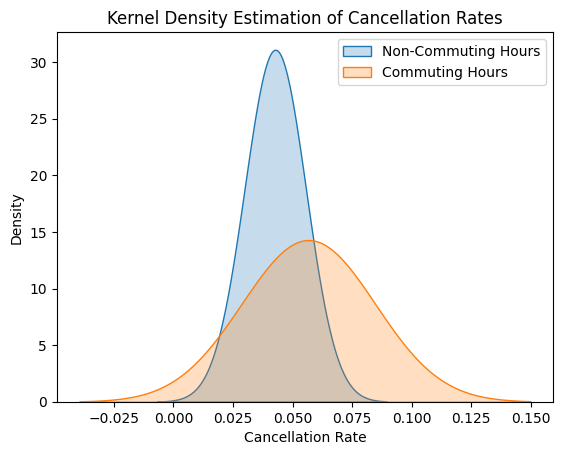

In [76]:
sns.kdeplot(non_commute, bw_adjust=5, label='Non-Commuting Hours', shade=True)
sns.kdeplot(commute, bw_adjust=5, label='Commuting Hours', shade=True)

plt.xlabel('Cancellation Rate')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Cancellation Rates')
plt.legend()
plt.show()


We can interpret this KDE plot as non-commuting hour having its mean cancellation rate around 0.04 with lesser variance compared to commuting hour KDE, where it is centred around the mean 0.06 and has a larger standard deviation in comparison.
The cancellation rate is higher for non-commuting hour but since the deviance is greater too, there could be various factors for it.


Non-commuting hour: Strong central tendancy
Commuting hour: Wider range of cancellation rate


We can interpret this as, during commuting hour(orange graph) the tolerance for waiting more is less. And so riders might tend to cancel often.

# 2 Waiting times and commuting versus non-commuting hours
### 1. What is the difference in the number of ridesharing trips between the treatment and control groups during commuting hours? Is the difference statistically significant? What about rider cancellation and payouts? (20%)


In [77]:
#treat_commute = df[df.commute & df.treat]
treat_commute=df[(df['commute']==True) & (df['treat']==True)]
control_commute= df[(df['commute']==True) & (df['treat']==False)]

if treat_commute['total_trips'].sum() > control_commute['total_trips'].sum():
  print("Treatment group has more trips compared to Control group during commute hours")
else:
  print("Control group has more trips compared to Treatment group during commute hours")

treat_commute_total_trips=treat_commute['total_trips'].sum()
control_commute_total_trips=control_commute['total_trips'].sum()


difference=abs( treat_commute['total_trips'].sum()-control_commute['total_trips'].sum())
difference



Control group has more trips compared to Treatment group during commute hours


3219

This implies that people are ready to wait for more time and during commute hours, which seems counterintuitive. Let's see if this difference is statistically significant using two-sample t-tests.

In [89]:
t_test , p_value= ttest_ind(treat_commute['total_trips'],control_commute['total_trips'])
t_test, p_value, treat_commute_total_trips, control_commute_total_trips

(1.4196622182817156, 0.17279343556167226, 47241, 50460)

p-value is greater than 0.05 which suggests that the difference is not statistically significant. So we can not accept the fact that more number of trips with the control group during commute hours implies that people prefer to wait longer.

### Now, for rider cancellation rates and payouts:

In [92]:
mean_treat_cancel= treat_commute['cancellation_rate'].mean()
mean_control_cancel= control_commute['cancellation_rate'].mean()

print("Mean values of cancellation rates: ")
print("Control group cancellation rate mean : ",round(mean_control_cancel,2))
print("Treat group cancellation rate mean   : ",round(mean_treat_cancel,2))
print("Differnece: ",mean_treat_cancel-mean_control_cancel )


mean_treat_payout= treat_commute['total_driver_payout'].mean()
mean_control_payout= control_commute['total_driver_payout'].mean()

print("\nMean values of driver payout rates: ")
print("Control group driver payout rates mean : ",round(mean_control_payout,2))
print("Treat group driver payout rates mean   : ",round(mean_treat_payout,2))
print("Differnece: ",round(mean_control_payout -mean_treat_payout))


Mean values of cancellation rates: 
Control group cancellation rate mean :  0.05
Treat group cancellation rate mean   :  0.06
Differnece:  0.01585870832872384

Mean values of driver payout rates: 
Control group driver payout rates mean :  39524.42
Treat group driver payout rates mean   :  35744.23
Differnece:  3780


We see that average cancellation rate is higher for Treatment group than the control group.

This implies passengers tend to cancel more when the waiting time is increased from 2 mintues to 5 minutes.

We can aslo see that the average driver payout is higher for the control group that is when the waiting time is 2 minutes. Let's check the statistical significance of these results.

In [80]:
t_test, p_value= ttest_ind(treat_commute['cancellation_rate'],control_commute['cancellation_rate'] )
t_test, p_value, mean_control_cancel, mean_treat_cancel

(6.86409733133709,
 2.0176254691588186e-06,
 0.04861365381951811,
 0.06447236214824195)

The p-value is less than 0.05 and this suggests that difference in the rider cancellations between the treatment groups and control groups is statistically significant.

In [81]:
t_test, p_value= ttest_ind(treat_commute['total_driver_payout'],control_commute['total_driver_payout'] )
t_test, p_value, mean_control_payout, mean_treat_payout

(-1.6806315641161096, 0.11010498008681915, 39524.422611, 35744.22831)

The p-value is greater than 0.05 and this suggests that difference in the driver payouts between the treatment groups and control groups is not statistically significant.

### 2. What is the difference in the number of ridesharing trips between the treatment and control groups during non-commuting hours? Is the difference statistically significant? What about rider cancellation and payouts? (20%)


In [88]:
#treat_commute = df[df.commute & df.treat]
treat_non_commute=df[(df['commute']==False) & (df['treat']==True)]
control_non_commute= df[(df['commute']==False) & (df['treat']==False)]

if treat_non_commute['total_trips'].sum() > control_non_commute['total_trips'].sum():
  print("Treatment group has more trips compared to Control group during non-commute hours")
else:
  print("Control group has more trips compared to Treatment group during non-commute hours")

treat_non_commute_total_trips=treat_non_commute['total_trips'].sum()
control_non_commute_total_trips=control_non_commute['total_trips'].sum()


difference=abs( treat_non_commute['total_trips'].sum()-control_non_commute['total_trips'].sum())
difference



Control group has more trips compared to Treatment group during non-commute hours


2256

In [83]:
t_test , p_value= ttest_ind(treat_non_commute['total_trips'],control_non_commute['total_trips'])
t_test, p_value, treat_non_commute_total_trips, control_non_commute_total_trips

(-0.598129019162737, 0.5510542032399828, 197204, 199460)

p-value is greater than 0.05 which suggests that the difference is not statistically significant. So we can not accept the fact that more number of trips with the control group during non-commute hours implies that people prefer to wait longer.

In [93]:
mean_treat_cancel= treat_non_commute['cancellation_rate'].mean()
mean_control_cancel= control_non_commute['cancellation_rate'].mean()

print("Mean values of cancellation rates: ")
print("Control group cancellation rate mean : ",mean_control_cancel)
print("Treat group cancellation rate mean   : ",mean_treat_cancel)
print("Differnece: ",mean_treat_cancel-mean_control_cancel )


mean_treat_payout= treat_non_commute['total_driver_payout'].mean()
mean_control_payout= control_non_commute['total_driver_payout'].mean()

print("\nMean values of driver payout rates: ")
print("Control group driver payout rates mean : ",mean_control_payout)
print("Treat group driver payout rates mean   : ", mean_treat_payout)
print("Differnece: ",mean_control_payout -mean_treat_payout)


Mean values of cancellation rates: 
Control group cancellation rate mean :  0.03982014066357305
Treat group cancellation rate mean   :  0.0454916416648984
Differnece:  0.005671501001325352

Mean values of driver payout rates: 
Control group driver payout rates mean :  27360.449546037737
Treat group driver payout rates mean   :  25567.91447981132
Differnece:  1792.5350662264173


In [94]:
t_test, p_value= ttest_ind(treat_non_commute['cancellation_rate'],control_non_commute['cancellation_rate'] )
t_test, p_value, mean_control_cancel, mean_treat_cancel

(5.731757186149868,
 9.785562231033288e-08,
 0.03982014066357305,
 0.0454916416648984)

In [95]:
t_test, p_value= ttest_ind(treat_non_commute['total_driver_payout'],control_non_commute['total_driver_payout'] )
t_test, p_value, mean_control_payout, mean_treat_payout

(-2.9716013997967057,
 0.003680442840381374,
 27360.449546037737,
 25567.91447981132)

The p-value is less than 0.05 and this suggests that difference in the driver payouts between the treatment groups and control groups is statistically significant during non-commute hours.